In [ ]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#reading the data and creating a dataframe, setting date as Index(axis=0)
data = pd.read_csv('/content/2021_2022.csv', index_col='Date', parse_dates=True,dayfirst=True)

In [ ]:
#display data
data.head()

,NO2,CO,PM2.5,PM10,AQI_Value
Date,,,,,
2021-01-01,NaN,NaN,NaN,NaN,99
2021-01-02,NaN,NaN,NaN,NaN,94
2021-01-03,NaN,NaN,NaN,NaN,72
2021-01-04,NaN,NaN,NaN,NaN,59
2021-01-05,NaN,NaN,NaN,NaN,39


In [ ]:
print(data.AQI_Value)

Date
2021-01-01    99
2021-01-02    94
2021-01-03    72
2021-01-04    59
2021-01-05    39
              ..
2022-12-27    45
2022-12-28    40
2022-12-29    76
2022-12-30    64
2022-12-31    43
Name: AQI_Value, Length: 730, dtype: int64


Text(0, 0.5, 'AQI VALUES')

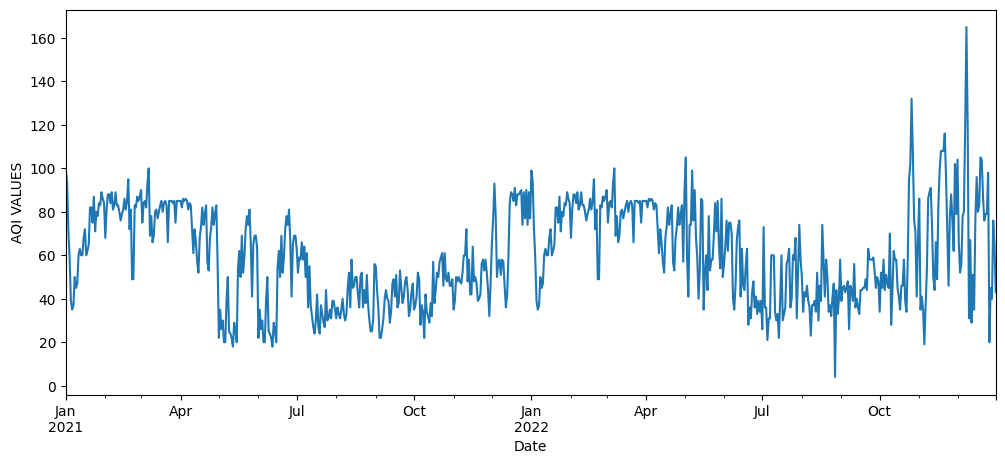

In [ ]:
#visualize the dataset
data['AQI_Value'].plot(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('AQI VALUES')

In [ ]:
#dropping unwanted attreibutes
data=data.drop( ['NO2','CO','PM2.5','PM10'], axis=1)
data.head()

,AQI_Value
Date,
2021-01-01,99
2021-01-02,94
2021-01-03,72
2021-01-04,59
2021-01-05,39


In [ ]:
print(data.shape)
df_train=data.iloc[:-146]
df_test=data.iloc[-146:]
print(df_train.shape,df_test.shape)

(730, 1)
(584, 1) (146, 1)


In [ ]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
print(start)
print(end)

584
729


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [ ]:
#Seasonal - fit stepwise auto-ARIMA
import pmdarima as pm
smodel = pm.auto_arima(data, start_p=0, start_q=0,
                         test='adf',
                         max_p=1, max_q=1, m=1,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                        error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6590.162, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5924.930, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6220.078, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8145.193, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5908.131, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5948.058, Time=0.38 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.585 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2950.065
Date:                Tue, 17 Oct 2023   AIC                           5908.131
Time:                        07:47:15   BIC                           5926.503
Sample:                    01-01-2021   HQIC                          5915.219
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.2823      1.387      5.973      0.000       5.565      11.000
ar.L1          0.8626      0.021     41.089      0.000       0.821       0.904
ma.L1         -0.2278      0.037     -6.220      0.000      -0.300      -0.156
sigma2       189.2661      7.035     26.905      0.000     175.479     203.054
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               347.18
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Model training and Model fitting- Model 4
from statsmodels.tsa.arima.model import ARIMA

# 0,1,1 ARIMA Model
model = ARIMA(data, order=(1,0,1))
model4 = model.fit()
model4.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              AQI_Value   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2950.068
Date:                Tue, 17 Oct 2023   AIC                           5908.136
Time:                        07:47:31   BIC                           5926.508
Sample:                    01-01-2021   HQIC                          5915.224
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0729      2.935     20.469      0.000      54.321      65.825
ar.L1          0.8626      0.021     41.091      0.000       0.821       0.904
ma.L1         -0.2278      0.037     -6.222      0.000      -0.300      -0.156
sigma2       189.1984      7.029     26.916      0.000     175.421     202.975
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               347.12
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

584
729
2022-08-08    41.098060
2022-08-09    32.217552
2022-08-10    39.081606
2022-08-11    40.645147
2022-08-12    42.270861
                ...    
2022-12-27    40.927517
2022-12-28    46.143860
2022-12-29    44.158175
2022-12-30    66.557935
2022-12-31    64.042947
Freq: D, Name: ARIMA Predictions, Length: 146, dtype: float64


<Axes: >

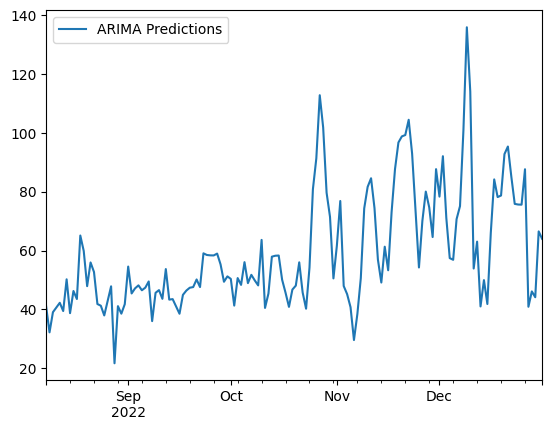

In [ ]:
#predictions Model 4
start=len(df_train)
end=len(df_train)+len(df_test)-1
print(start)
print(end)
pred4=model4.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred4)
pred4.plot(legend=True)
plt.xlabel('Date')
plt.ylabel('AQI VALUES')

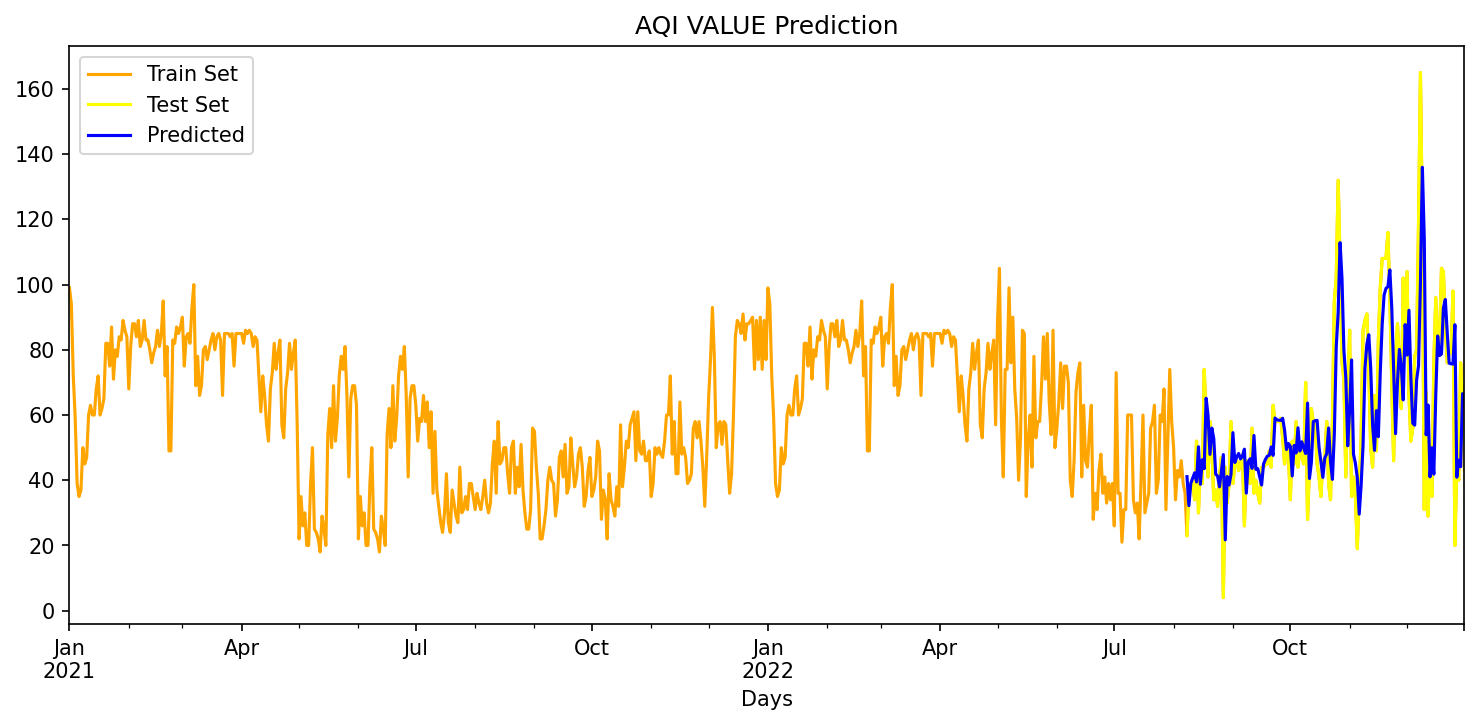

In [ ]:
#visualizing Model 4
plt.figure(figsize=(16, 3), dpi=150)

# in plot method we set the label and color of the curve.
ax=data['AQI_Value'].plot(label='Train Set', color='orange',figsize=(12, 5))
df_test['AQI_Value'].plot(ax=ax,label='Test Set',color='yellow',figsize=(12,5))
pred4.plot(ax=ax,label='Predicted',color='blue',figsize=(12, 5))

# adding title to the plot
plt.title('AQI VALUE Prediction')

# adding Label to the x-axis
plt.xlabel('Days')
plt.ylabel('AQI VALUES')
# adding legend to the curve
plt.legend()

In [ ]:
#Model evaluation 4
import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=df_test['AQI_Value']
predictions=pred4
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE of model 2: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE of model 2: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE of Model 2: %f' %mae)

RMSE of model 2: 19.736063
MAPE of model 2: 0.354677
MAE of Model 2: 14.389041
